## Titanic - Machine Learning from Disaster


#### Objectives
    Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

In [1]:
# #load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)


Python version: 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.4.4
matplotlib version: 3.5.2
NumPy version: 1.21.5
SciPy version: 1.9.1
IPython version: 7.31.1
scikit-learn version: 1.2.2
-------------------------


In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.width', 75)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 12)

### Read Data

The dataset is also given to us on a golden plater with test and train data at [Kaggle's Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data)



In [8]:
data_raw = pd.read_csv('train.csv')
data_val = pd.read_csv('test.csv')

In [9]:
data1 = data_raw.copy(deep=True)

In [10]:
data_cleaner = [data1,data_val]
#data_cleaner = pd.concat(data_concat)


In [11]:
data_cleaner

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  \
 0                              Braund, Mr. Owen Harris    male 22.00   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.00   
 2                               Heikkinen, Miss. Laina  female 26.00   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female 35.00   
 4                             Allen, Mr. William Henry    male 35.00   
 ..                                                 ...     ...   ...   
 886               

In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
data1.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
350,351,0,3,"Odahl, Mr. Nils Martin",male,23.00,0,0,7267,9.22,NaN,S
708,709,1,1,"Cleaver, Miss. Alice",female,22.00,0,0,113781,151.55,NaN,S
640,641,0,3,"Jensen, Mr. Hans Peder",male,20.00,0,0,350050,7.85,NaN,S
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.00,1,0,36947,78.27,D20,C
691,692,1,3,"Karun, Miss. Manca",female,4.00,0,1,349256,13.42,NaN,C
572,573,1,1,"Flynn, Mr. John Irwin (""Irving"")",male,36.00,0,0,PC 17474,26.39,E25,S
285,286,0,3,"Stankovic, Mr. Ivan",male,33.00,0,0,349239,8.66,NaN,C
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.25,NaN,C
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.79,NaN,Q
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.78,C95,S


In [14]:
data1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
data_val.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
data1.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.00,891.00,891.00,891,891,714.00,891.00,891.00,891,891.00,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.00,0.38,2.31,NaN,NaN,29.70,0.52,0.38,NaN,32.20,NaN,NaN
std,257.35,0.49,0.84,NaN,NaN,14.53,1.10,0.81,NaN,49.69,NaN,NaN
min,1.00,0.00,1.00,NaN,NaN,0.42,0.00,0.00,NaN,0.00,NaN,NaN
25%,223.50,0.00,2.00,NaN,NaN,20.12,0.00,0.00,NaN,7.91,NaN,NaN
50%,446.00,0.00,3.00,NaN,NaN,28.00,0.00,0.00,NaN,14.45,NaN,NaN
75%,668.50,1.00,3.00,NaN,NaN,38.00,1.00,0.00,NaN,31.00,NaN,NaN


In [17]:
drop_column = ['PassengerId','Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace = True)

In [18]:
embac_mask = data1['Embarked'].isnull()
data1[embac_mask]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.00,0,0,80.00,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,80.00,NaN


In [19]:
for dataset in data_cleaner:    
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
#delete the cabin feature/column and others previously stated to exclude in train dataset
#drop_column = ['PassengerId','Cabin', 'Ticket']
#data1.drop(drop_column, axis=1, inplace = True)
#data_val.drop(drop_column, axis=1, inplace = True)
print(data1.isnull().sum())
print("-"*10)
print(data_val.isnull().sum())


Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [20]:
data1[embac_mask]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.00,0,0,80.00,S
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,80.00,S


In [21]:
#CREATE: Feature Engineering for train and test/validation dataset

for dataset in data_cleaner:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['ISAlone'] = 1
    dataset['ISAlone'].loc[dataset['FamilySize'] > 1] = 0 
    dataset["Title"] = dataset["Name"].str.split(",",expand = True)[1].str.split(".",expand = True)[0]
    dataset["Farebin"] = pd.qcut(dataset["Fare"].astype('int16'),4)
    dataset["AgeBin"] = pd.cut(dataset['Age'].astype('int16'),5)

In [22]:
data_val.Title.value_counts()

 Mr        240
 Miss       78
 Mrs        72
 Master     21
 Col         2
 Rev         2
 Ms          1
 Dr          1
 Dona        1
Name: Title, dtype: int64

In [23]:
#cleanup rare title names
stat_min = 10
for dataset in data_cleaner:
    title_names = (dataset['Title'].value_counts() < stat_min) 
    dataset['Title'] = dataset['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)

In [24]:
data_val.Title.value_counts()

 Mr        240
 Miss       78
 Mrs        72
 Master     21
Misc         7
Name: Title, dtype: int64

Include only Most used values like MR,Miss,Mrs & Master rest convert into "Misc"

We will convert categorical data to dummy variables for mathematical analysis. There are multiple ways to encode categorical variables; we will use the sklearn and pandas functions.

In [25]:
label = LabelEncoder()
for dataset in data_cleaner:
    dataset["Sex_code"] = label.fit_transform(dataset["Sex"])
    dataset["Embarked_code"] = label.fit_transform(dataset["Embarked"])
    dataset["Title_code"] = label.fit_transform(dataset["Title"])
    dataset["Agebin_code"] = label.fit_transform(dataset["AgeBin"])
    dataset["Farebin_code"] = label.fit_transform(dataset["Farebin"])
    
Target = ['Survived']
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'ISAlone'] 
data1_x_calc = ['Sex_code','Pclass', 'Embarked_code', 'Title_code','SibSp', 'Parch', 'Age', 'Fare']
data1_xy = Target + data1_x
print('orginalx y:' ,data1_xy,'\n')

data1x_bin =  ['Sex_code','Pclass', 'Embarked_code', 'Title_code', 'FamilySize', 'Agebin_code', 'Farebin_code']
data1_xy_bin = Target + data1x_bin
print('Bin X y:' ,data1_xy_bin,'\n')


data1_dummy  = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data_xy_dummy = Target + data1_x_dummy 
print('Dummy X Y: ', data_xy_dummy, '\n')


orginalx y: ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'ISAlone'] 

Bin X y: ['Survived', 'Sex_code', 'Pclass', 'Embarked_code', 'Title_code', 'FamilySize', 'Agebin_code', 'Farebin_code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'ISAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_ Master', 'Title_ Miss', 'Title_ Mr', 'Title_ Mrs', 'Title_Misc'] 



Onehot encoding the Categorical variables 

In [26]:

data11_dummy  = pd.get_dummies(data1[data1_x],drop_first= True)
data11_x_dummy = data11_dummy.columns.tolist()
data_xy_dummy = Target + data1_x_dummy 
print('Dummy X Y: ', data_xy_dummy, '\n')


Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'ISAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_ Master', 'Title_ Miss', 'Title_ Mr', 'Title_ Mrs', 'Title_Misc'] 



In [27]:
frame = [data11_dummy,data1[['Agebin_code','Farebin_code']]]

In [28]:
train = pd.concat(frame, axis=1)

In [29]:
train

,Pclass,SibSp,Parch,Age,Fare,FamilySize,ISAlone,Sex_male,Embarked_Q,Embarked_S,Title_ Miss,Title_ Mr,Title_ Mrs,Title_Misc,Agebin_code,Farebin_code
0,3,1,0,22.00,7.25,2,0,1,0,1,0,1,0,0,1,0
1,1,1,0,38.00,71.28,2,0,0,0,0,0,0,1,0,2,3
2,3,0,0,26.00,7.92,1,1,0,0,1,1,0,0,0,1,0
3,1,1,0,35.00,53.10,2,0,0,0,1,0,0,1,0,2,3
4,3,0,0,35.00,8.05,1,1,1,0,1,0,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,27.00,13.00,1,1,1,0,1,0,0,0,1,1,1
887,1,0,0,19.00,30.00,1,1,0,0,1,1,0,0,0,1,2
888,3,1,2,28.00,23.45,4,0,0,0,1,1,0,0,0,1,2
889,1,0,0,26.00,30.00,1,1,1,0,0,0,1,0,0,1,2


In [30]:
train.drop(columns=['Age','Fare'],inplace=True)

In [31]:
train

,Pclass,SibSp,Parch,FamilySize,ISAlone,Sex_male,Embarked_Q,Embarked_S,Title_ Miss,Title_ Mr,Title_ Mrs,Title_Misc,Agebin_code,Farebin_code
0,3,1,0,2,0,1,0,1,0,1,0,0,1,0
1,1,1,0,2,0,0,0,0,0,0,1,0,2,3
2,3,0,0,1,1,0,0,1,1,0,0,0,1,0
3,1,1,0,2,0,0,0,1,0,0,1,0,2,3
4,3,0,0,1,1,1,0,1,0,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,1,1,1,0,1,0,0,0,1,1,1
887,1,0,0,1,1,0,0,1,1,0,0,0,1,2
888,3,1,2,4,0,0,0,1,1,0,0,0,1,2
889,1,0,0,1,1,1,0,0,0,1,0,0,1,2


# split train and test for each df

In [32]:
data1_x_dummy

['Pclass',
 'SibSp',
 'Parch',
 'Age',
 'Fare',
 'FamilySize',
 'ISAlone',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Title_ Master',
 'Title_ Miss',
 'Title_ Mr',
 'Title_ Mrs',
 'Title_Misc']

In [33]:
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc],data1[Target],random_state=0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1x_bin],data1[Target],random_state=0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy],data1[Target],random_state=0)

In [34]:
print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()

Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_code,Pclass,Embarked_code,Title_code,FamilySize,Agebin_code,Farebin_code
105,1,3,2,2,1,1,0
68,0,3,2,1,7,1,0
253,1,3,2,2,2,1,2
320,1,3,2,2,1,1,0
706,0,2,2,3,1,2,1


In [35]:
#Discrete Variable Correlation by Survival using Pivot table

for x in data1_x:
    if data1[x].dtype != 'float':
        print('Survival Correlation by :', x)
        print(data1[[x,Target[0]]].groupby(x, as_index=True).mean())
        print("-"*10,'\n')


Survival Correlation by : Sex
        Survived
Sex             
female      0.74
male        0.19
---------- 

Survival Correlation by : Pclass
        Survived
Pclass          
1           0.63
2           0.47
3           0.24
---------- 

Survival Correlation by : Embarked
          Survived
Embarked          
C             0.55
Q             0.39
S             0.34
---------- 

Survival Correlation by : Title
         Survived
Title            
 Master      0.57
 Miss        0.70
 Mr          0.16
 Mrs         0.79
Misc         0.44
---------- 

Survival Correlation by : SibSp
       Survived
SibSp          
0          0.35
1          0.54
2          0.46
3          0.25
4          0.17
5          0.00
8          0.00
---------- 

Survival Correlation by : Parch
       Survived
Parch          
0          0.34
1          0.55
2          0.50
3          0.60
4          0.00
5          0.20
6          0.00
---------- 

Survival Correlation by : FamilySize
            Survived
FamilySi

In [36]:
data1_x = data1_x + ['Title']

In [37]:
#Discrete Variable Correlation by Survival & Non-Survival:

for column in data1_x:
    if data1[column].dtype != 'float':
        group = data1.groupby([column, 'Survived'])
        counts = group.size().unstack()
        prob = counts.div(counts.sum(axis=1), axis=0)
        print('Probability of survival and non-survival by', column)
        print(prob)
        print("-"*50,'\n')
print(pd.crosstab(data1["Title"],data1[Target[0]]))

Probability of survival and non-survival by Sex
Survived    0    1
Sex               
female   0.26 0.74
male     0.81 0.19
-------------------------------------------------- 

Probability of survival and non-survival by Pclass
Survived    0    1
Pclass            
1        0.37 0.63
2        0.53 0.47
3        0.76 0.24
-------------------------------------------------- 

Probability of survival and non-survival by Embarked
Survived    0    1
Embarked          
C        0.45 0.55
Q        0.61 0.39
S        0.66 0.34
-------------------------------------------------- 

Probability of survival and non-survival by Title
Survived    0    1
Title             
 Master  0.42 0.57
 Miss    0.30 0.70
 Mr      0.84 0.16
 Mrs     0.21 0.79
Misc     0.56 0.44
-------------------------------------------------- 

Probability of survival and non-survival by SibSp
Survived    0    1
SibSp             
0        0.65 0.35
1        0.46 0.54
2        0.54 0.46
3        0.75 0.25
4        0.83 0.17
5   

In [38]:
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'ISAlone'] 


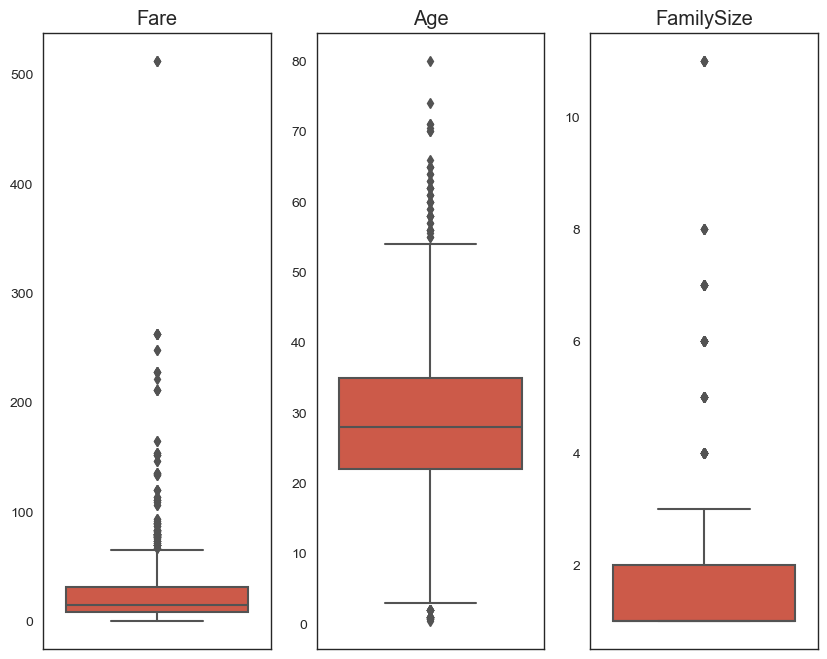

In [39]:
fig, axs = plt.subplots(ncols=3, figsize=(10, 8))

sns.boxplot(y='Fare', data=data1, orient='v',ax=axs[0]).set(ylabel = None,title='Fare')
sns.boxplot(y='Age', data=data1, orient='v',ax=axs[1]).set(ylabel = None,title='Age')
sns.boxplot(y='FamilySize', data=data1, orient='v',ax=axs[2]).set(ylabel = None,title='FamilySize')
plt.show()

There are many outliers present in Continuous variables

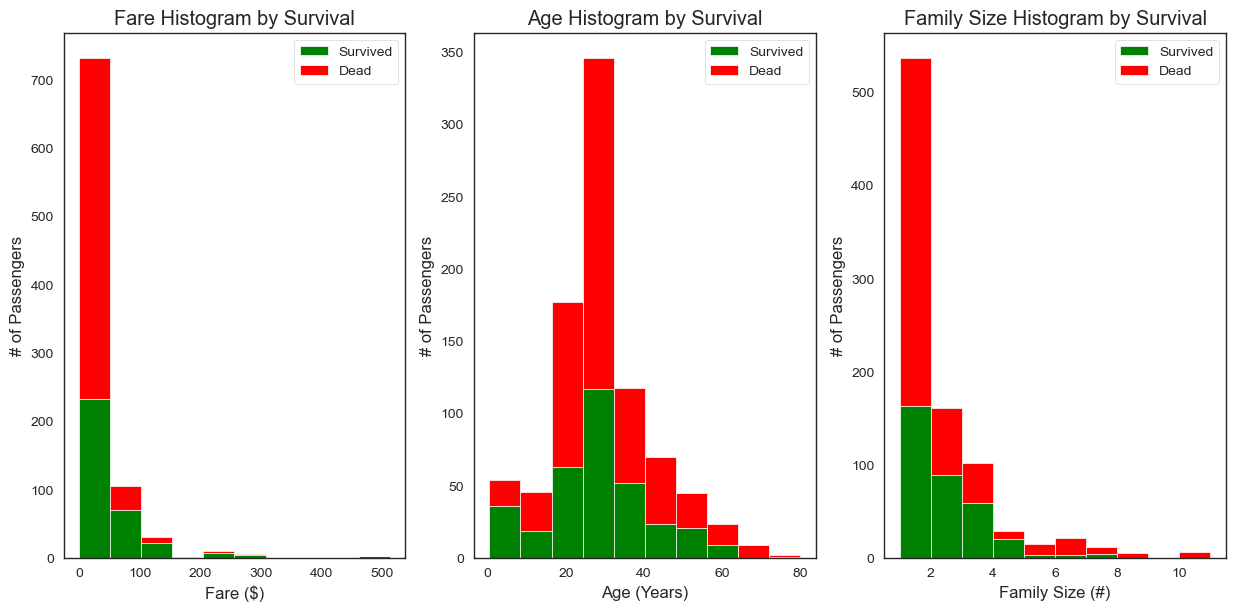

In [281]:
plt.figure(figsize=[15,15])
plt.subplot(234)
plt.hist(x = [data1[data1['Survived']==1]['Fare'], data1[data1['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x = [data1[data1['Survived']==1]['Age'], data1[data1['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x = [data1[data1['Survived']==1]['FamilySize'], data1[data1['Survived']==0]['FamilySize']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()

- Lower Fare mostly Dead
- Travelling alone mostly dead

In [ ]:
sns.pointplot(x = "Farebin", y = "Survived", data= data1, ax = axes[0]).tick_params(axis='x', labelrotation = 40)


<AxesSubplot:xlabel='FamilySize', ylabel='Survived'>

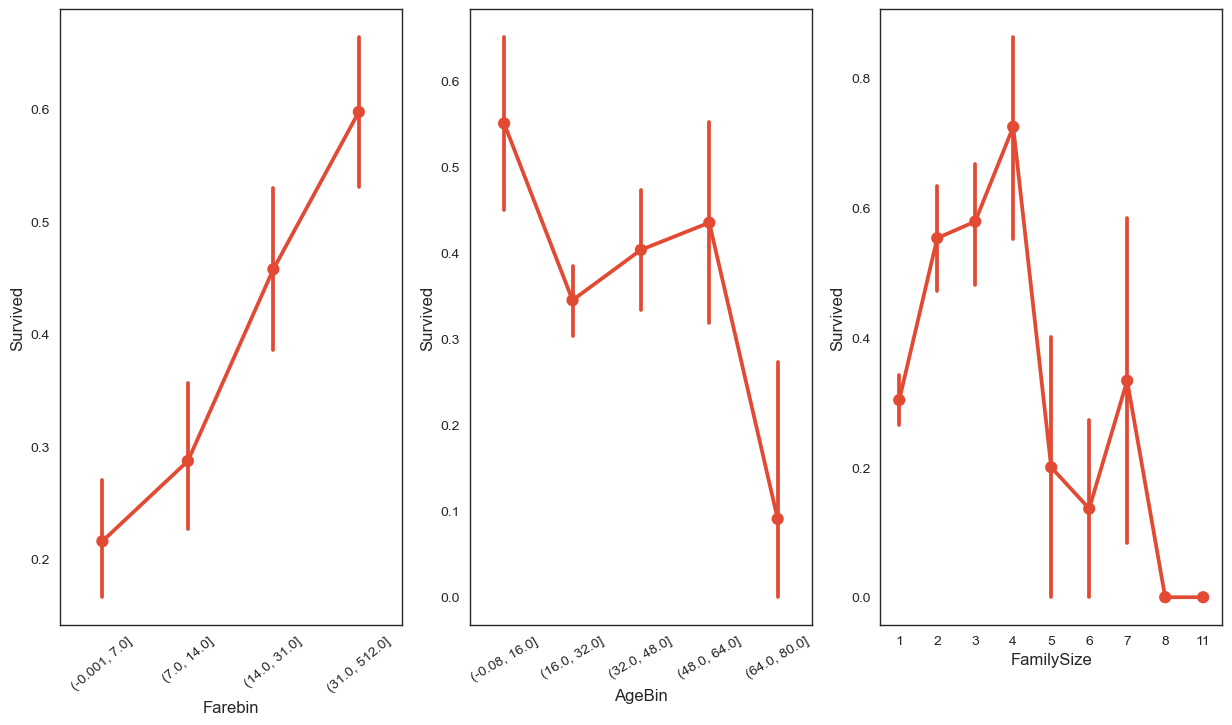

In [326]:
#graph individual features by survival

fig ,axes = plt.subplots(ncols =3,figsize = (15,8))

sns.pointplot(x = "Farebin", y = "Survived", data= data1, ax = axes[0]).tick_params(axis='x', labelrotation = 40)
sns.pointplot(x = "AgeBin", y = "Survived", data= data1, ax = axes[1]).tick_params(axis='x', labelrotation = 30)
sns.pointplot(x = "FamilySize", y = "Survived", data= data1, ax = axes[2])

<AxesSubplot:xlabel='ISAlone', ylabel='Survived'>

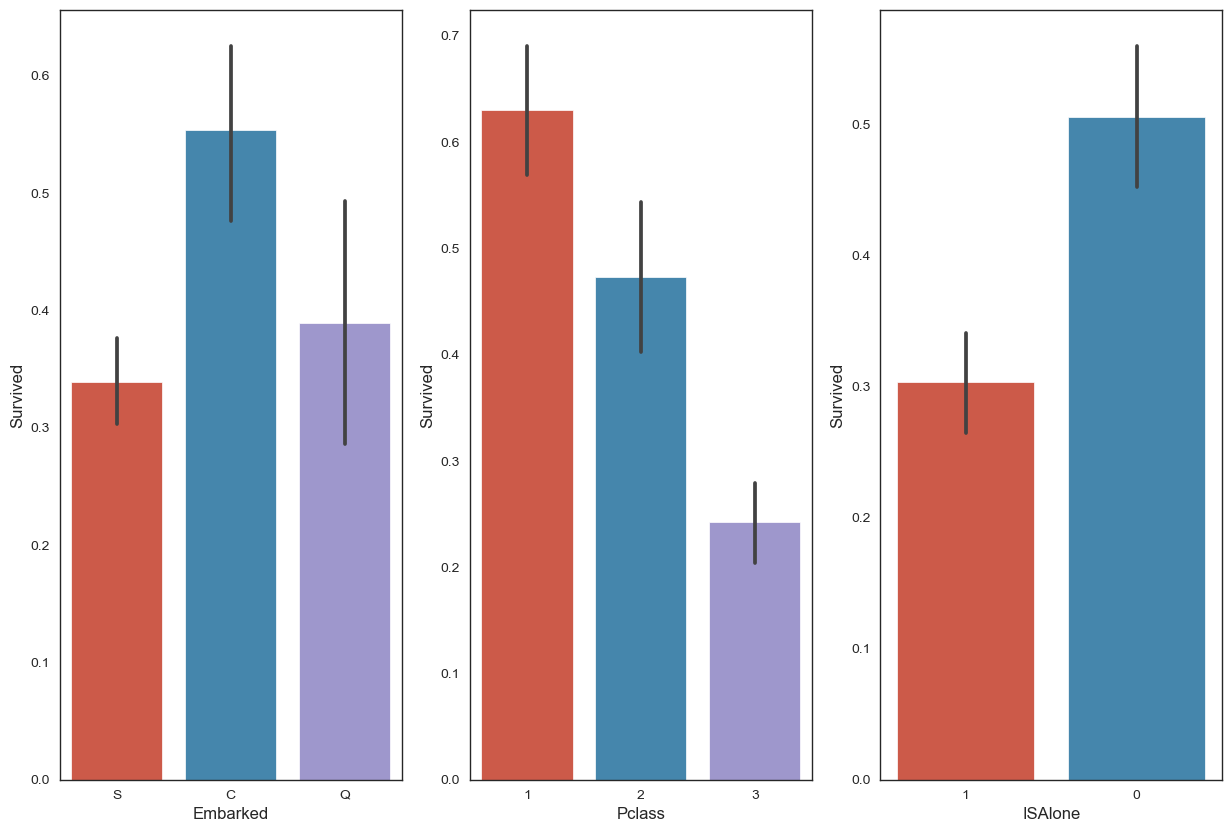

In [328]:
fig ,axes = plt.subplots(ncols =3,figsize = (15,10))

sns.barplot(x = "Embarked", y='Survived',data = data1,ax = axes[0])
sns.barplot(x = "Pclass", y='Survived',order = [1,2,3],data = data1,ax = axes[1])
sns.barplot(x = "ISAlone", y='Survived',order = [1,0],data = data1,ax = axes[2])


Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparison')

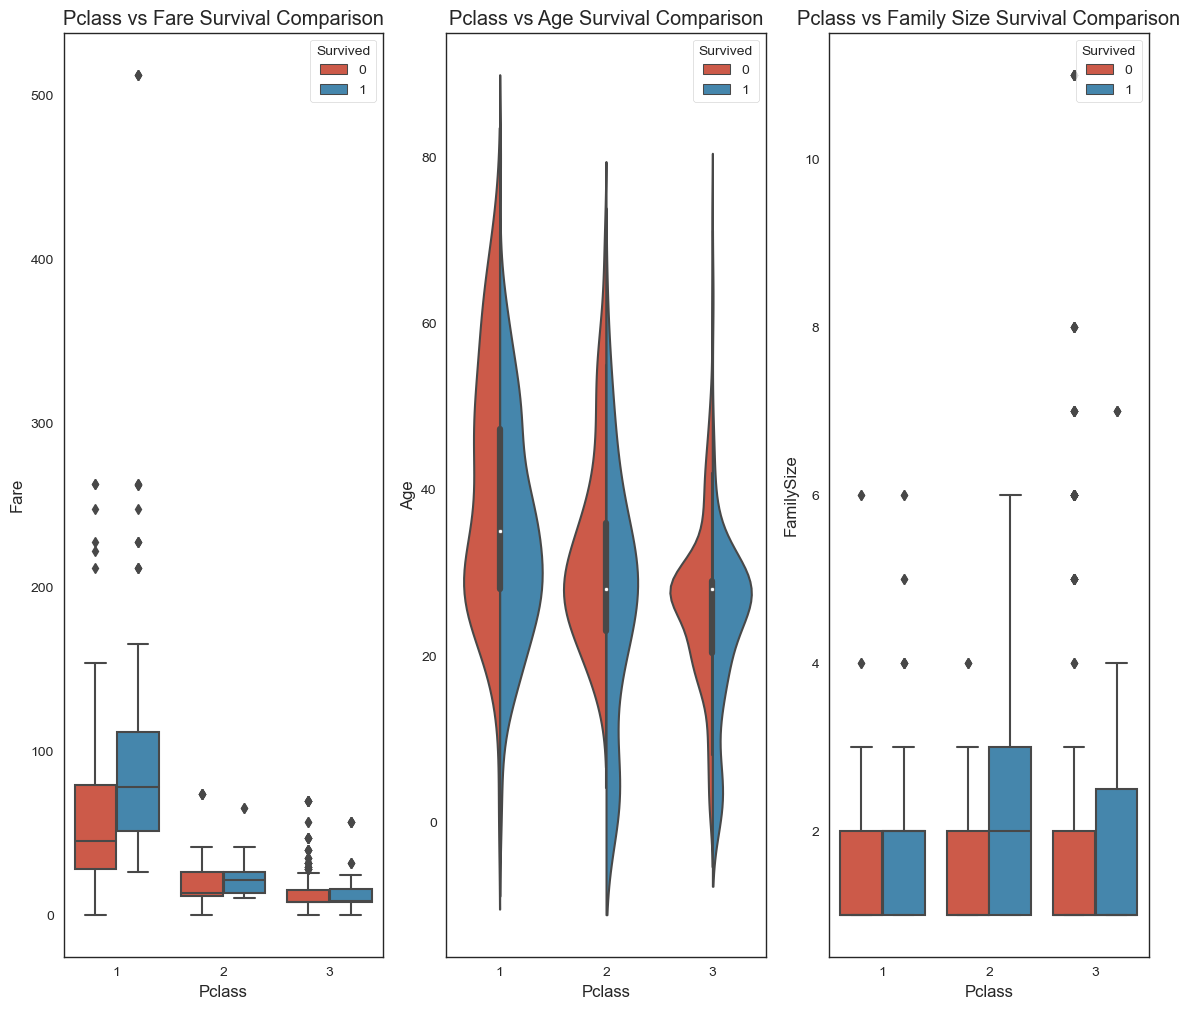

In [349]:
#graph distribution of qualitative data: Pclass

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = data1, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data1, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = data1, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

Text(0.5, 1.0, 'Sex vs IsAlone Survival Comparison')

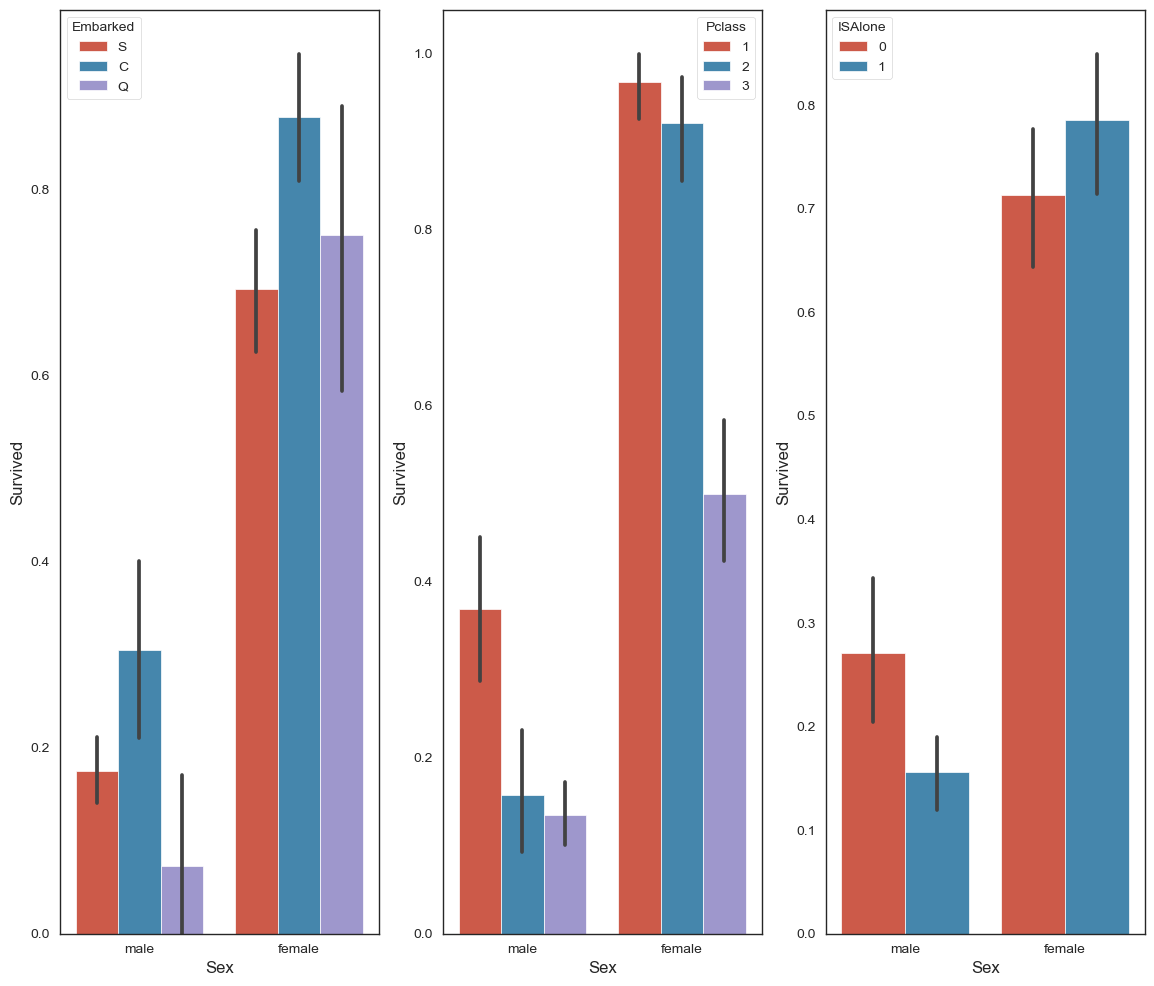

In [352]:
#we know sex mattered in survival, now let's compare sex and a 2nd feature
fig, qaxis = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=data1, ax = qaxis[0])
axis1.set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=data1, ax  = qaxis[1])
axis1.set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'ISAlone', data=data1, ax  = qaxis[2])
axis1.set_title('Sex vs IsAlone Survival Comparison')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

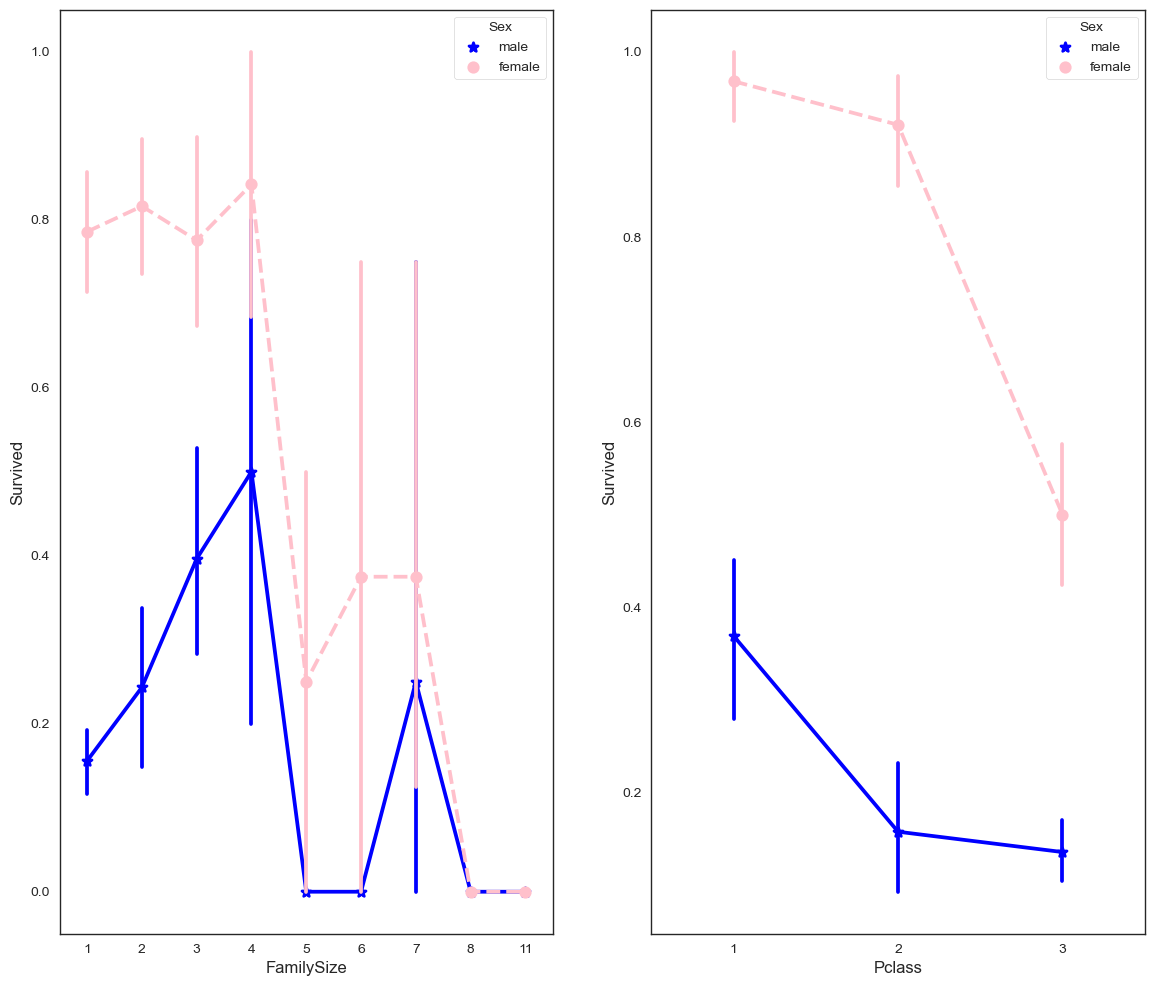

In [353]:
#more side-by-side comparisons
fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(14,12))

#how does family size factor with sex & survival compare
sns.pointplot(x="FamilySize", y="Survived", hue="Sex", data=data1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis1)

#how does class factor with sex & survival compare
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis2)

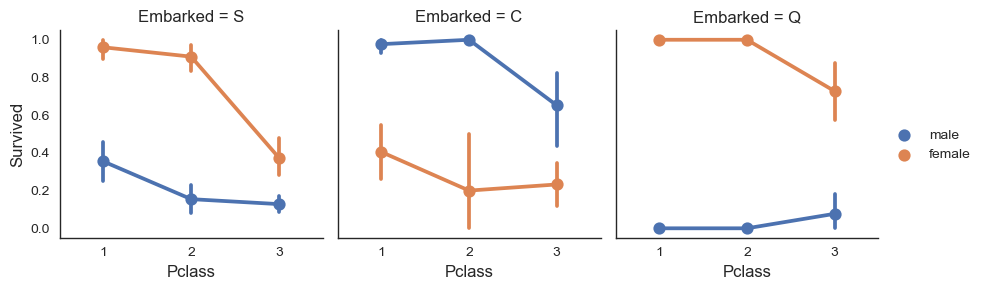

In [354]:
#how does embark port factor with class, sex, and survival compare
#facetgrid: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
e = sns.FacetGrid(data1, col = 'Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette = 'deep')
e.add_legend()


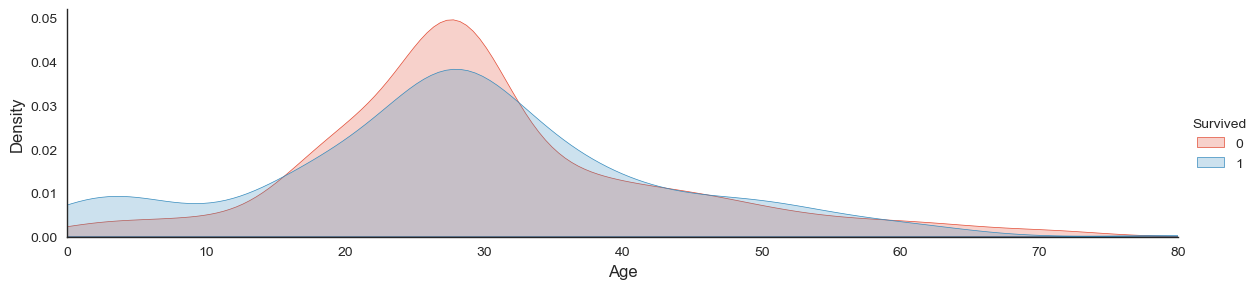

In [355]:
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( data1, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , data1['Age'].max()))
a.add_legend()

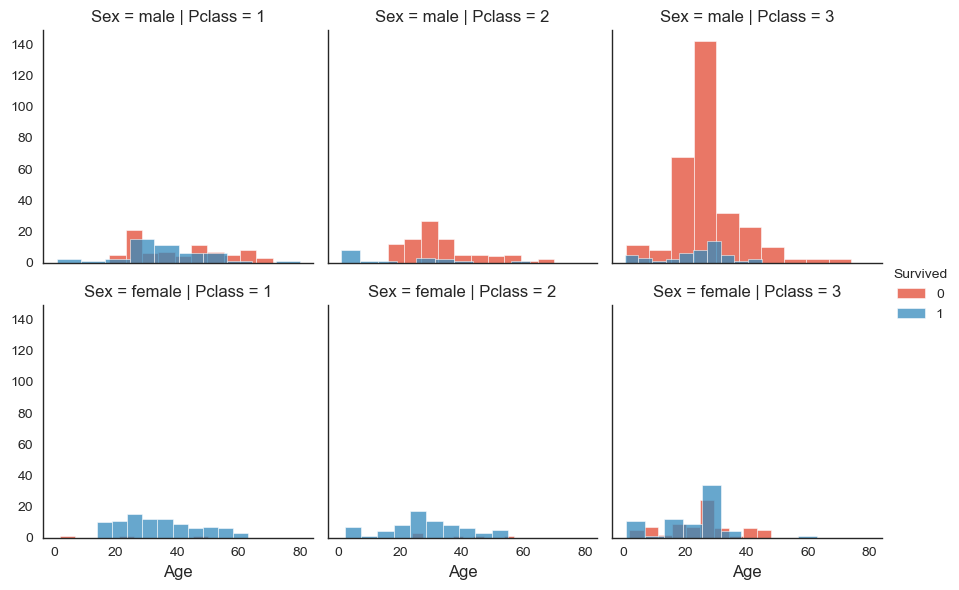

In [356]:
#histogram comparison of sex, class, and age by survival
h = sns.FacetGrid(data1, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

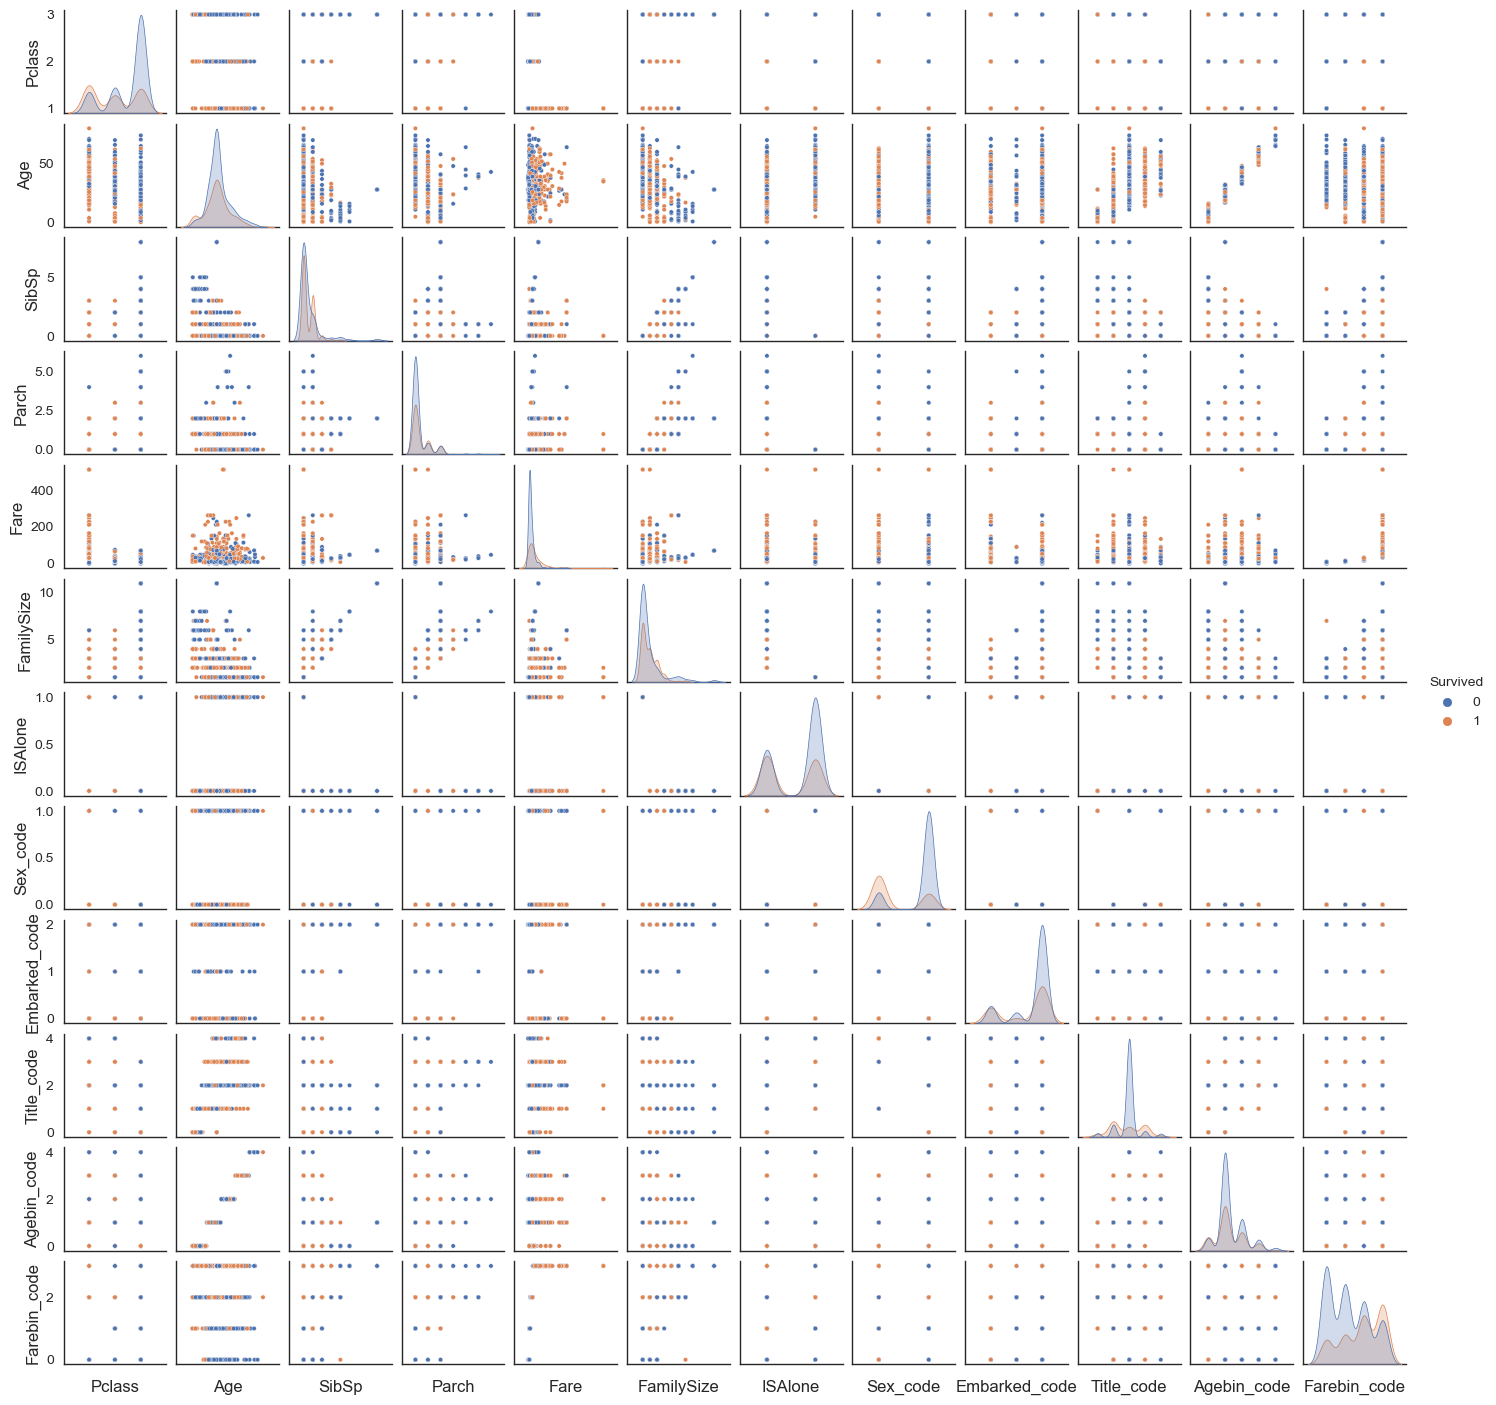

In [357]:
#pair plots of entire dataset
pp = sns.pairplot(data1, hue = 'Survived', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

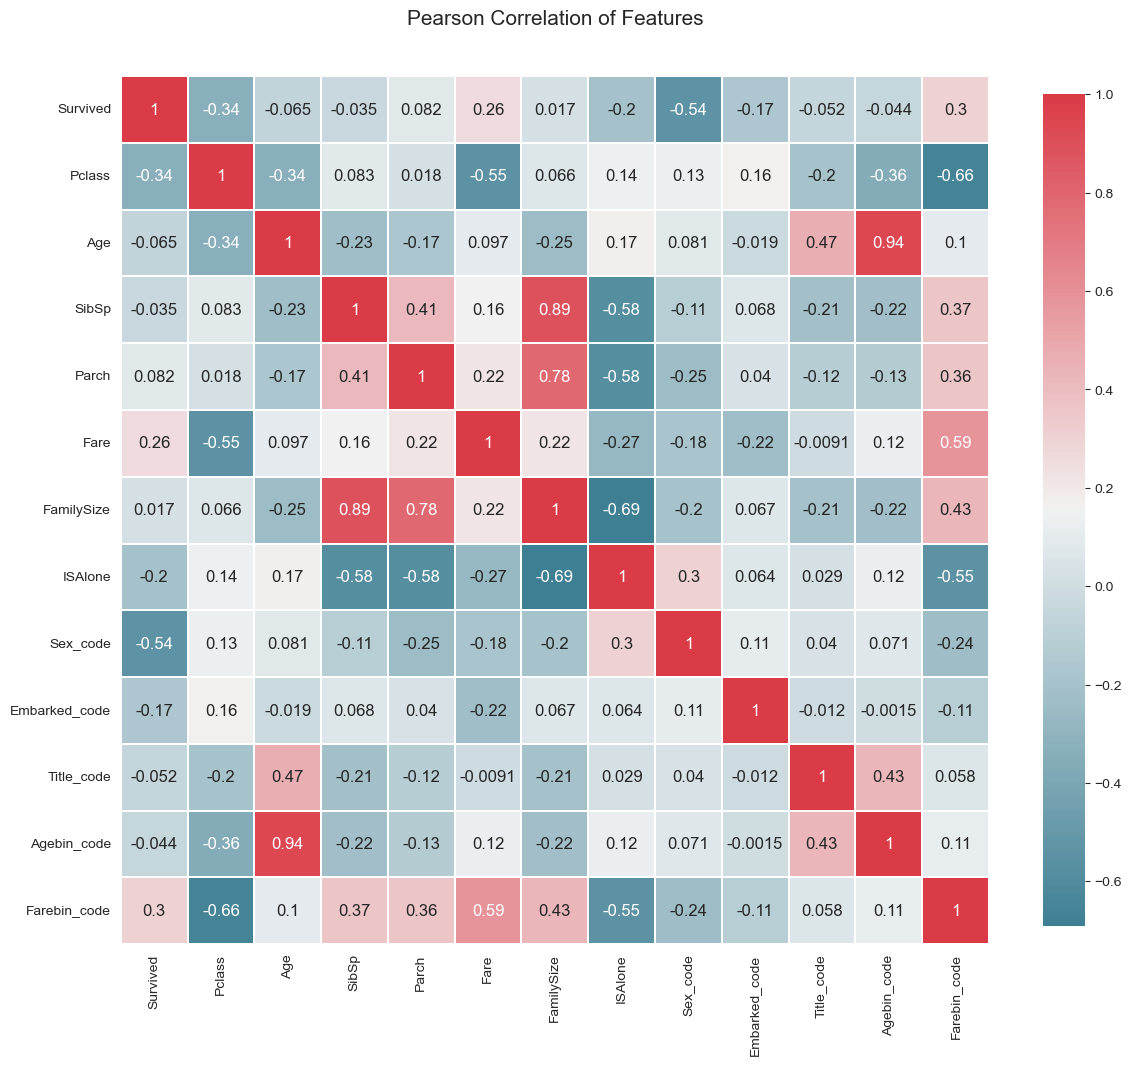

In [358]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data1)

In [31]:
MLA_predict[MLA_name]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    0
890    0
Name: XGBClassifier, Length: 891, dtype: int32

In [40]:
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%


In [43]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]



#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data1[Target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, data1[data1x_bin], data1[Target], cv  = cv_split,return_train_score = True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()   
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(data1[data1x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1x_bin])
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
21,XGBClassifier,"{'objective': 'binary:logistic', 'use_label_en...",0.89,0.83,0.04,0.18
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.90,0.83,0.07,0.28
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.84,0.83,0.04,0.09
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.83,0.83,0.04,0.09
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.90,0.83,0.06,0.16
...,...,...,...,...,...,...
12,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.80,0.79,0.08,0.00
11,BernoulliNB,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':...",0.79,0.78,0.05,0.01
9,SGDClassifier,"{'alpha': 0.0001, 'average': False, 'class_wei...",0.77,0.76,0.13,0.01
10,Perceptron,"{'alpha': 0.0001, 'class_weight': None, 'early...",0.75,0.75,0.13,0.00


In [30]:
for alg in MLA:
    cv_results = model_selection.cross_validate(alg, data1[data1x_bin], data1[Target], cv  = cv_split,return_train_score = True)
    alg.fit(data1[data1x_bin], data1[Target])
    print(cv_results)

{'fit_time': array([0.064996  , 0.08396053, 0.09156466, 0.07430673, 0.06199932,
       0.06118441, 0.0599978 , 0.05875206, 0.0603323 , 0.06014848]), 'score_time': array([0.01204038, 0.00996184, 0.00999951, 0.0205617 , 0.0079999 ,
       0.00799966, 0.00854397, 0.00899911, 0.00795078, 0.0079999 ]), 'test_score': array([0.81716418, 0.79850746, 0.80970149, 0.80223881, 0.82835821,
       0.81343284, 0.79477612, 0.79850746, 0.82835821, 0.84328358]), 'train_score': array([0.81273408, 0.84644195, 0.81273408, 0.85205993, 0.80898876,
       0.82958801, 0.82209738, 0.80524345, 0.81460674, 0.80898876])}
{'fit_time': array([0.01900268, 0.01800513, 0.01699948, 0.01801157, 0.01700807,
       0.01803923, 0.01803517, 0.01789689, 0.01900291, 0.01899886]), 'score_time': array([0.00303555, 0.00299931, 0.00200057, 0.00297356, 0.00295496,
       0.00299716, 0.00299907, 0.00300241, 0.00296545, 0.00296116]), 'test_score': array([0.82462687, 0.80597015, 0.83208955, 0.8358209 , 0.80970149,
       0.82462687, 0

In [25]:
cv_results

{'fit_time': array([0.07499456, 0.07600379, 0.07900119, 0.07920766, 0.07499933,
        0.07799792, 0.08113289, 0.08026552, 0.07600069, 0.07706285]),
 'score_time': array([0.00400329, 0.00399685, 0.00499845, 0.00399661, 0.00400233,
        0.00400305, 0.00400162, 0.00399923, 0.00400233, 0.00527668]),
 'test_score': array([0.83955224, 0.82462687, 0.82089552, 0.81716418, 0.84328358,
        0.8358209 , 0.83208955, 0.81716418, 0.81716418, 0.86567164]),
 'train_score': array([0.88951311, 0.8988764 , 0.8988764 , 0.89138577, 0.88389513,
        0.90074906, 0.89700375, 0.89513109, 0.89513109, 0.87827715])}

In [23]:
cv_results

{'fit_time': array([0.07860732, 0.09224415, 0.08558607, 0.07095647, 0.07339811,
        0.07099986, 0.07299685, 0.07875299, 0.07514167, 0.07599902]),
 'score_time': array([0.00230742, 0.        , 0.00400138, 0.00499749, 0.00500011,
        0.00499845, 0.00500202, 0.00500202, 0.00499964, 0.00400114]),
 'test_score': array([0.83955224, 0.82462687, 0.82089552, 0.81716418, 0.84328358,
        0.8358209 , 0.83208955, 0.81716418, 0.81716418, 0.86567164]),
 'train_score': array([0.88951311, 0.8988764 , 0.8988764 , 0.89138577, 0.88389513,
        0.90074906, 0.89700375, 0.89513109, 0.89513109, 0.87827715])}

In [15]:
test = MLA_compare.copy(deep=True)

In [16]:
a = ['MLA Name','MLA Train Accuracy Mean','MLA Test Accuracy Mean']
test = test[a]

In [17]:
test2 = pd.melt(test, id_vars=['MLA Name'], value_vars=['MLA Train Accuracy Mean', 'MLA Test Accuracy Mean'])


In [18]:
print(test2.head(2))
print(test2.tail(2))


                 MLA Name                 variable value
0           XGBClassifier  MLA Train Accuracy Mean  0.89
1  RandomForestClassifier  MLA Train Accuracy Mean  0.90
                       MLA Name                variable value
42                SGDClassifier  MLA Test Accuracy Mean  0.74
43  PassiveAggressiveClassifier  MLA Test Accuracy Mean  0.72


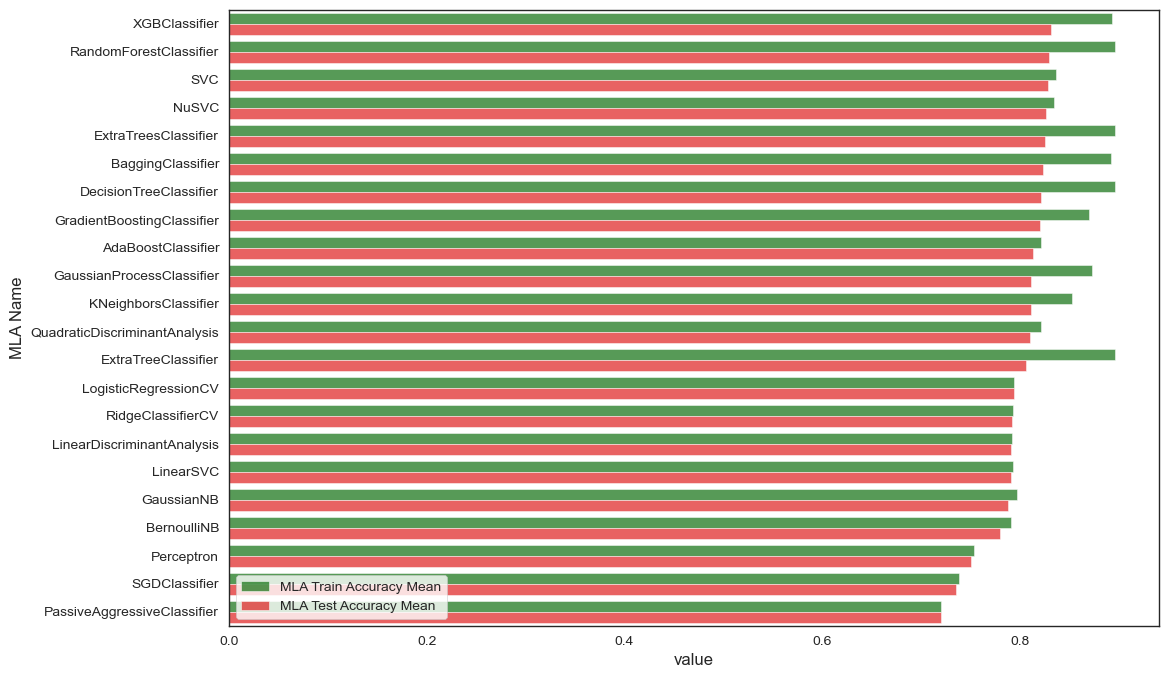

In [19]:
sns.barplot(y='MLA Name', x = 'value', data = test2,hue = 'variable',palette=["g", "red"],alpha = 0.7)
plt.legend(loc="lower left")


XGBClassifier & RandomForestClassifier Performed well than others with 0.83 accuracy than others

Text(0, 0.5, 'Algorithm')

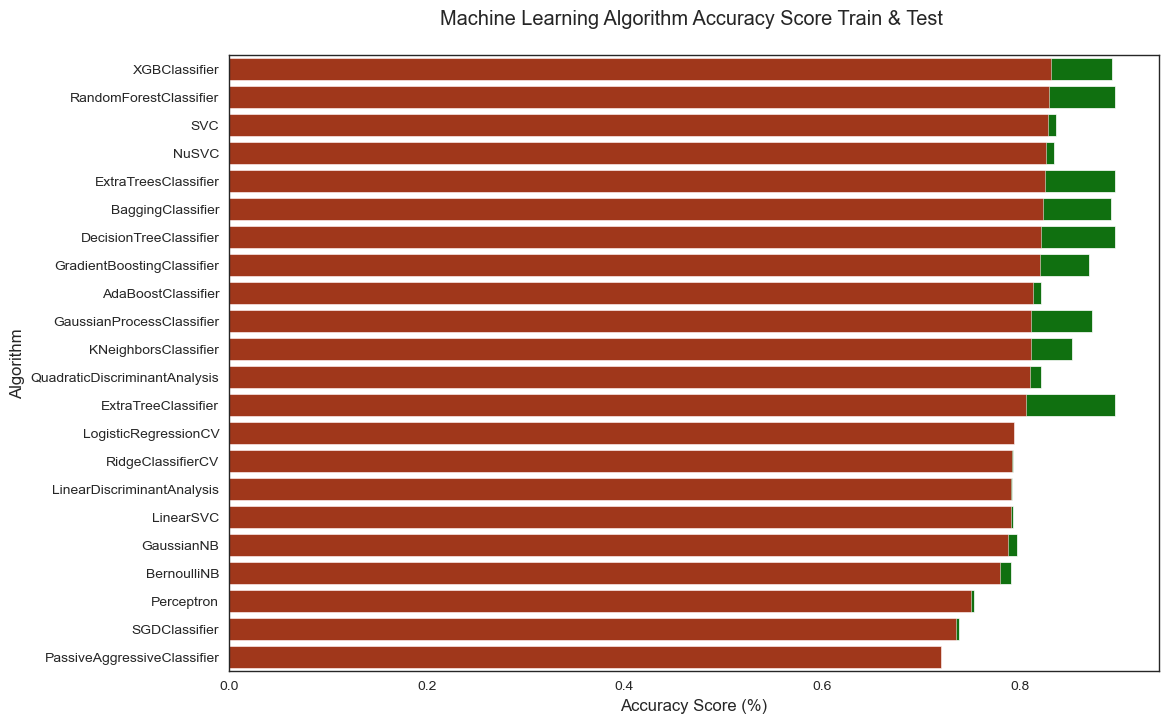

In [14]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA Train Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'g')
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'r',alpha = 0.7)
#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score Train & Test \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

In [50]:
#Plot Accuracy Summary
#Credit: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
#handmade data model using brain power (and Microsoft Excel Pivot Tables for quick calculations)
def mytree(df):
    
    #initialize table to store predictions
    Model = pd.DataFrame(data = {'Predict':[]})
    male_title = ['Master'] #survived titles

    for index, row in df.iterrows():

        #Question 1: Were you on the Titanic; majority died
        Model.loc[index, 'Predict'] = 0

        #Question 2: Are you female; majority survived
        if (df.loc[index, 'Sex'] == 'female'):
                  Model.loc[index, 'Predict'] = 1

        #Question 3A Female - Class and Question 4 Embarked gain minimum information

        #Question 5B Female - FareBin; set anything less than .5 in female node decision tree back to 0       
        if ((df.loc[index, 'Sex'] == 'female') & 
            (df.loc[index, 'Pclass'] == 3) & 
            (df.loc[index, 'Embarked'] == 'S')  &
            (df.loc[index, 'Fare'] > 8)

           ):
                  Model.loc[index, 'Predict'] = 0

        #Question 3B Male: Title; set anything greater than .5 to 1 for majority survived
        if ((df.loc[index, 'Sex'] == 'male') &
            (df.loc[index, 'Title'] in male_title)
            ):
            Model.loc[index, 'Predict'] = 1
        
        
    return Model


#model data
Tree_Predict = mytree(data1)
print('Decision Tree Model Accuracy/Precision Score: {:.2f}%\n'.format(metrics.accuracy_score(data1['Survived'], Tree_Predict)*100))



Decision Tree Model Accuracy/Precision Score: 81.37%



              precision    recall  f1-score   support

           0       0.80      0.94      0.86       549
           1       0.86      0.62      0.72       342

    accuracy                           0.81       891
   macro avg       0.83      0.78      0.79       891
weighted avg       0.82      0.81      0.81       891

Confusion matrix, without normalization
[[514  35]
 [131 211]]
Normalized confusion matrix
[[0.94 0.06]
 [0.38 0.62]]


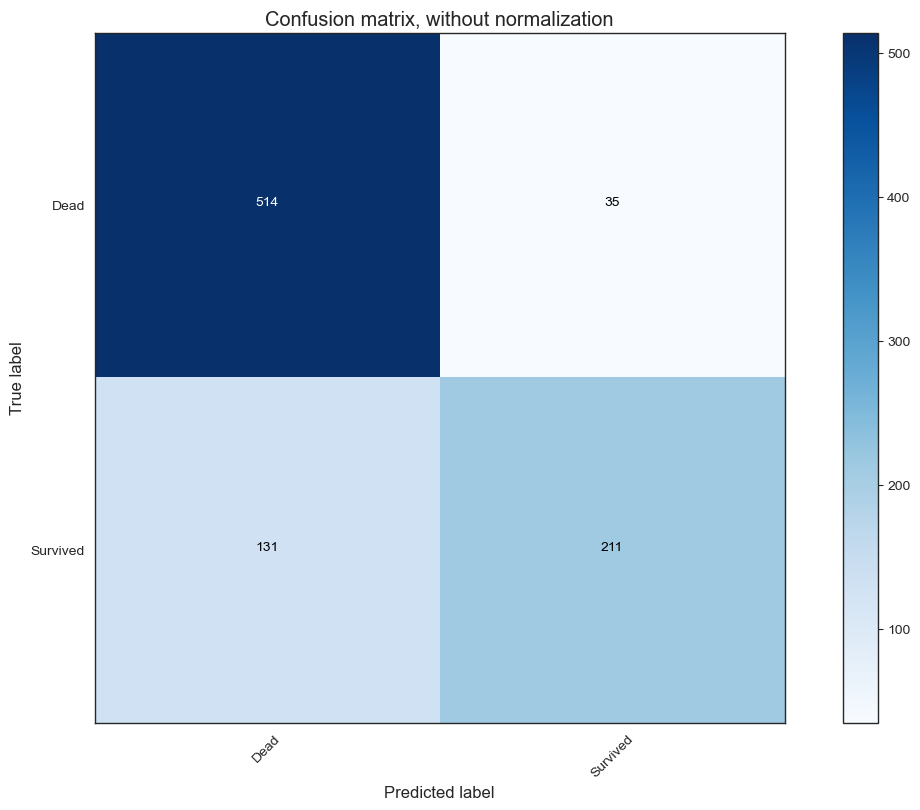

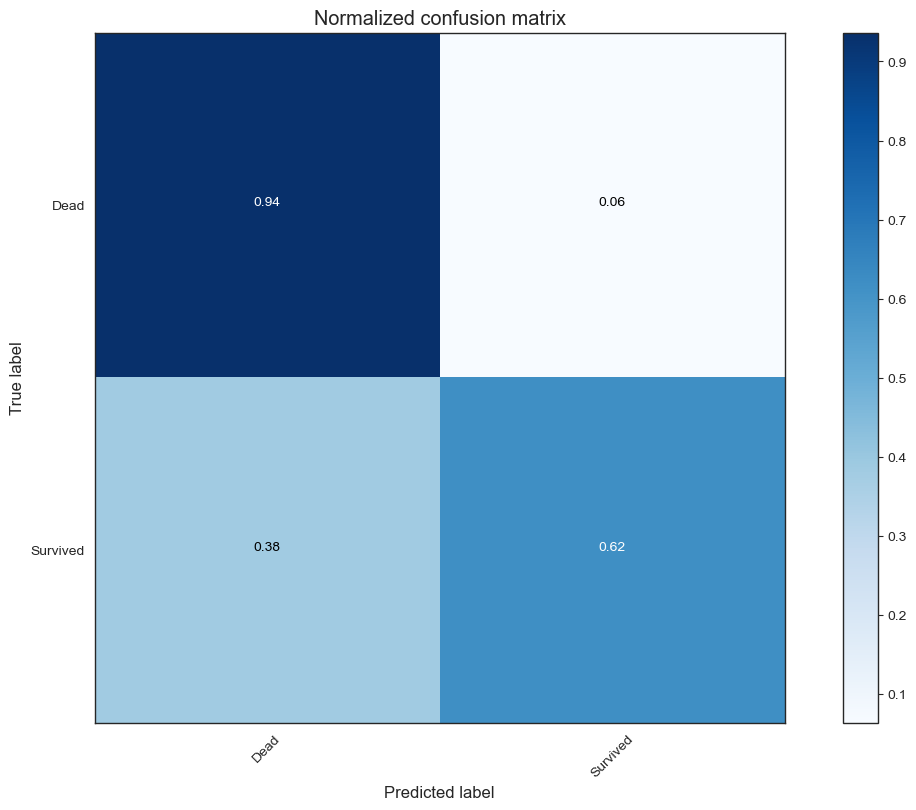

In [169]:

#Accuracy Summary Report with http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report
#Where recall score = (true positives)/(true positive + false negative) w/1 being best:http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score
#And F1 score = weighted average of precision and recall w/1 being best: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score
print(metrics.classification_report(data1['Survived'], Tree_Predict))
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(data1['Survived'], Tree_Predict)
np.set_printoptions(precision=2)

class_names = ['Dead', 'Survived']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, 
                      title='Normalized confusion matrix')

In [46]:
#why choose one model, when you can pick them all with voting classifier
#removed models w/o attribute 'predict_proba' required for vote classifier and models with a 1.0 correlation to another model
vote_est = [
    #Ensemble Methods: http://scikit-learn.org/stable/modules/ensemble.html
    ('ada', ensemble.AdaBoostClassifier()),
    ('bc', ensemble.BaggingClassifier()),
    ('etc',ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),

    #Gaussian Processes: http://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-classification-gpc
    ('gpc', gaussian_process.GaussianProcessClassifier()),
    
    #GLM: http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
    ('lr', linear_model.LogisticRegressionCV()),
    
    #Navies Bayes: http://scikit-learn.org/stable/modules/naive_bayes.html
    ('bnb', naive_bayes.BernoulliNB()),
    ('gnb', naive_bayes.GaussianNB()),
    
    #Nearest Neighbor: http://scikit-learn.org/stable/modules/neighbors.html
    ('knn', neighbors.KNeighborsClassifier()),
    
    #SVM: http://scikit-learn.org/stable/modules/svm.html
    ('svc', svm.SVC(probability=True)),
    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
   ('xgb', XGBClassifier())

]


#Hard Vote or majority rules
vote_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, data1[data1x_bin], data1[Target], cv  = cv_split,return_train_score = True)
vote_hard.fit(data1[data1x_bin], data1[Target])
print("Hard Voting Training w/bin score mean: {:.2f}". format(vote_hard_cv['train_score'].mean()*100)) 
print("Hard Voting Test w/bin score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))
print("Hard Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_hard_cv['test_score'].std()*100*3))
print('-'*10)


#Soft Vote or weighted probabilities
vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, data1[data1x_bin], data1[Target], cv  = cv_split,return_train_score = True)
vote_soft.fit(data1[data1x_bin], data1[Target])

print("Soft Voting Training w/bin score mean: {:.2f}". format(vote_soft_cv['train_score'].mean()*100)) 
print("Soft Voting Test w/bin score mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))
print("Soft Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*100*3))
print('-'*10)

Hard Voting Training w/bin score mean: 87.60
Hard Voting Test w/bin score mean: 82.50
Hard Voting Test w/bin score 3*std: +/- 4.20
----------
Soft Voting Training w/bin score mean: 88.05
Soft Voting Test w/bin score mean: 82.50
Soft Voting Test w/bin score 3*std: +/- 3.86
----------


In [40]:
#WARNING: Running is very computational intensive and time expensive.
#Code is written for experimental/developmental purposes and not production ready!


#Hyperparameter Tune with GridSearchCV: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_n_estimator = [10, 50, 100, 300]
grid_ratio = [.1, .25, .5, .75, 1.0]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]


grid_param = [
            [{
            #AdaBoostClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
            'n_estimators': grid_n_estimator, #default=50
            'learning_rate': grid_learn, #default=1
            #'algorithm': ['SAMME', 'SAMME.R'], #default=’SAMME.R
            'random_state': grid_seed
            }],
       
    
            [{
            #BaggingClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier
            'n_estimators': grid_n_estimator, #default=10
            'max_samples': grid_ratio, #default=1.0
            'random_state': grid_seed
             }],

    
            [{
            #ExtraTreesClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'random_state': grid_seed
             }],


            [{
            #GradientBoostingClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier
            #'loss': ['deviance', 'exponential'], #default=’deviance’
            'learning_rate': [.05], #default=0.1 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
            'n_estimators': [300], #default=100 -- 12/31/17 set to reduce runtime -- The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 264.45 seconds.
            #'criterion': ['friedman_mse', 'mse', 'mae'], #default=”friedman_mse”
            'max_depth': grid_max_depth, #default=3   
            'random_state': grid_seed
             }],

    
            [{
            #RandomForestClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
            'n_estimators': grid_n_estimator, #default=10
            'criterion': grid_criterion, #default=”gini”
            'max_depth': grid_max_depth, #default=None
            'oob_score': [True], #default=False -- 12/31/17 set to reduce runtime -- The best parameter for RandomForestClassifier is {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} with a runtime of 146.35 seconds.
            'random_state': grid_seed
             }],
    
            [{    
            #GaussianProcessClassifier
            'max_iter_predict': grid_n_estimator, #default: 100
            'random_state': grid_seed
            }],
        
    
            [{
            #LogisticRegressionCV - http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV
            'fit_intercept': grid_bool, #default: True
            #'penalty': ['l1','l2'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], #default: lbfgs
            'random_state': grid_seed
             }],
            
    
            [{
            #BernoulliNB - http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB
            'alpha': grid_ratio, #default: 1.0
             }],
    
    
            #GaussianNB - 
            [{}],
    
            [{
            #KNeighborsClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
            'n_neighbors': [1,2,3,4,5,6,7], #default: 5
            'weights': ['uniform', 'distance'], #default = ‘uniform’
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }],
            
    
            [{
            #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
            #http://blog.hackerearth.com/simple-tutorial-svm-parameter-tuning-python-r
            #'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': [1,2,3,4,5], #default=1.0
            'gamma': grid_ratio, #edfault: auto
            'decision_function_shape': ['ovo', 'ovr'], #default:ovr
            'probability': [True],
            'random_state': grid_seed
             }],

    
            [{
            #XGBClassifier - http://xgboost.readthedocs.io/en/latest/parameter.html
            'learning_rate': grid_learn, #default: .3
            'max_depth': [1,2,4,6,8,10], #default 2
            'n_estimators': grid_n_estimator, 
            'seed': grid_seed  
             }]   
        ]



start_total = time.perf_counter() #https://docs.python.org/3/library/time.html#time.perf_counter
for clf, param in zip (vote_est, grid_param): #https://docs.python.org/3/library/functions.html#zip

    #print(clf[1]) #vote_est is a list of tuples, index 0 is the name and index 1 is the algorithm
    #print(param)
    
    
    start = time.perf_counter()        
    best_search = model_selection.GridSearchCV(estimator = clf[1], param_grid = param, cv = cv_split, scoring = 'roc_auc')
    best_search.fit(data1[data1x_bin], data1[Target])
    run = time.perf_counter() - start

    best_param = best_search.best_params_
    print('The best parameter for {} is {} with a runtime of {:.2f} seconds.'.format(clf[1].__class__.__name__, best_param, run))
    clf[1].set_params(**best_param) 


run_total = time.perf_counter() - start_total
print('Total optimization time was {:.2f} minutes.'.format(run_total/60))

print('-'*10)

The best parameter for AdaBoostClassifier is {'learning_rate': 0.05, 'n_estimators': 300, 'random_state': 0} with a runtime of 42.69 seconds.
The best parameter for BaggingClassifier is {'max_samples': 0.25, 'n_estimators': 300, 'random_state': 0} with a runtime of 44.61 seconds.
The best parameter for ExtraTreesClassifier is {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 100, 'random_state': 0} with a runtime of 76.03 seconds.
The best parameter for GradientBoostingClassifier is {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} with a runtime of 45.71 seconds.
The best parameter for RandomForestClassifier is {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} with a runtime of 113.56 seconds.
The best parameter for GaussianProcessClassifier is {'max_iter_predict': 10, 'random_state': 0} with a runtime of 8.35 seconds.
The best parameter for LogisticRegressionCV is {'fit_intercept': True, 'random_state': 

In [41]:
#why choose one model, when you can pick them all with voting classifier
#removed models w/o attribute 'predict_proba' required for vote classifier and models with a 1.0 correlation to another model
vote_est = [
    #Ensemble Methods: http://scikit-learn.org/stable/modules/ensemble.html
    ('ada', ensemble.AdaBoostClassifier(learning_rate= 0.05, n_estimators= 300, random_state= 0)),
    ('bc', ensemble.BaggingClassifier(max_samples = 0.25, n_estimators= 300, random_state= 0)),
    ('etc',ensemble.ExtraTreesClassifier(criterion = 'gini', max_depth= 6, n_estimators= 100, random_state = 0)),
    ('gbc', ensemble.GradientBoostingClassifier(learning_rate = 0.05, max_depth = 2, n_estimators = 300, random_state= 0)),
    ('rfc', ensemble.RandomForestClassifier(criterion = 'gini', max_depth = 6, n_estimators = 100, oob_score = True, random_state = 0)),

    #Gaussian Processes: http://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-classification-gpc
    ('gpc', gaussian_process.GaussianProcessClassifier(max_iter_predict = 10, random_state = 0)),
    
    #GLM: http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
    ('lr', linear_model.LogisticRegressionCV(fit_intercept = True, random_state = 0, solver= 'saga')),
    
    #Navies Bayes: http://scikit-learn.org/stable/modules/naive_bayes.html
    ('bnb', naive_bayes.BernoulliNB(alpha = 0.1)),
    ('gnb', naive_bayes.GaussianNB()),
    
    #Nearest Neighbor: http://scikit-learn.org/stable/modules/neighbors.html
    ('knn', neighbors.KNeighborsClassifier(algorithm = 'auto', n_neighbors = 7, weights = 'uniform')),
    
    #SVM: http://scikit-learn.org/stable/modules/svm.html
    ('svc', svm.SVC(C = 4, decision_function_shape = 'ovo', gamma = 0.1, probability = True, random_state = 0)),
    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
   ('xgb', XGBClassifier(learning_rate = 0.03, max_depth = 2, n_estimators = 300, seed = 0))

]





grid_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
grid_hard_cv = model_selection.cross_validate(grid_hard, data1[data1x_bin], data1[Target], cv  = cv_split,return_train_score = True)
grid_hard.fit(data1[data1x_bin], data1[Target])

print("Hard Voting w/Tuned Hyperparameters Training w/bin score mean: {:.2f}". format(grid_hard_cv['train_score'].mean()*100)) 
print("Hard Voting w/Tuned Hyperparameters Test w/bin score mean: {:.2f}". format(grid_hard_cv['test_score'].mean()*100))
print("Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- {:.2f}". format(grid_hard_cv['test_score'].std()*100*3))
print('-'*10)



Hard Voting w/Tuned Hyperparameters Training w/bin score mean: 85.32
Hard Voting w/Tuned Hyperparameters Test w/bin score mean: 82.72
Hard Voting w/Tuned Hyperparameters Test w/bin score 3*std: +/- 4.72
----------


A sample Shap value for XGBClassifier

In [51]:
clf_xg = XGBClassifier(learning_rate = 0.03, max_depth = 2, n_estimators = 300, seed = 0)
xg = clf_xg.fit(data1[data1x_bin], data1[Target])

In [68]:
# SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model
import shap
explainer = shap.explainers.Tree(xg, data = data1[data1x_bin])
shap_values = explainer(data1[data1x_bin])

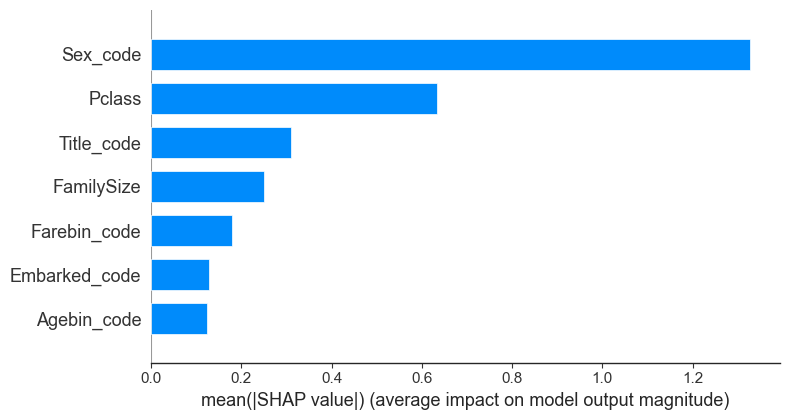

In [70]:
shap.summary_plot(shap_values, data1[data1x_bin],plot_type="bar")


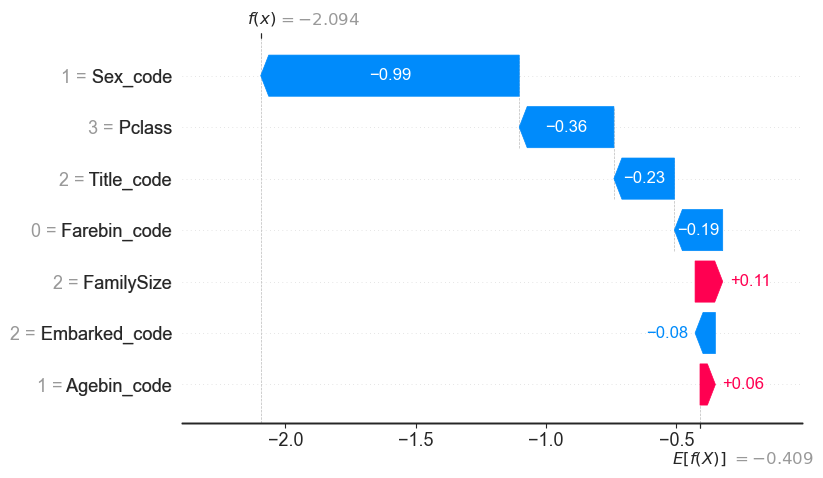

In [72]:
shap.plots.waterfall(shap_values[0])

If SEX = "MALE" and Class = 3 mostly they are not survived in ship

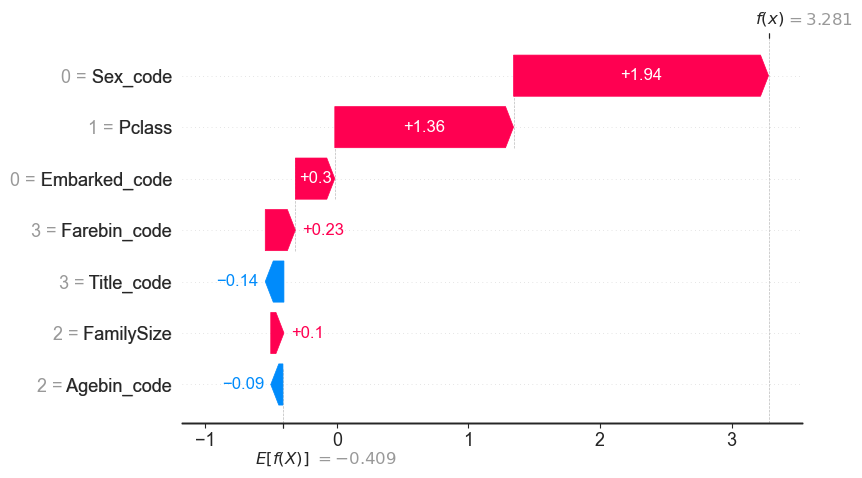

In [80]:
shap.plots.waterfall(shap_values[1])


If SEX = "FEMALE" and Class = 1 they all are survived from disaster

In [51]:
data_val['Survived'] = mytree(data_val).astype(int)


In [54]:
data_val['Survived'] = grid_hard.predict(data_val[data1x_bin])


In [55]:
submit = data_val[['PassengerId','Survived']]
submit.to_csv("D:\\python_dir_Jupyter\\Project_resume\\titanic\\subm1it.csv", index=False)


Submit the test prediction and get 0.77511 Accuracy  